In [2]:
import tensorflow as tf

### (NUMPY)

- np.transpose

- np.loadtxt

### VARS

- tf.constant(
    value,
    dtype=None,
    shape=None,
    name='Const',
    verify_shape=False
)

> https://www.tensorflow.org/api_docs/python/tf/constant

In [55]:
hello = tf.constant('Hello, Tensorflow')
print('This is raw constant. :', hello)

with tf.Session() as sess:
    print('This is raw constant. :', hello)
    print('After evaluation      :', hello.eval())
    print('After evaluation      :', sess.run(hello))

This is raw constant. : Tensor("Const_22:0", shape=(), dtype=string)
This is raw constant. : Tensor("Const_22:0", shape=(), dtype=string)
After evaluation      : b'Hello, Tensorflow'
After evaluation      : b'Hello, Tensorflow'


- tf.placeholder

- tf.Variable
> variable을 생성할 때에 초기값이 필요하며, 초기값의 type과 shape이 계속 사용됨(assign으로 변경 가능)

In [113]:
w = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='w')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(w.eval())

[ 0.32378173]


> - [method]
  - eval

### ENVIRONMENT

- tf.global_variables_initializer()
 > -  https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
> - This is just a shortcut for variable_initializer(global_variables())

- tf.global_variables()

- tf.train.Saver

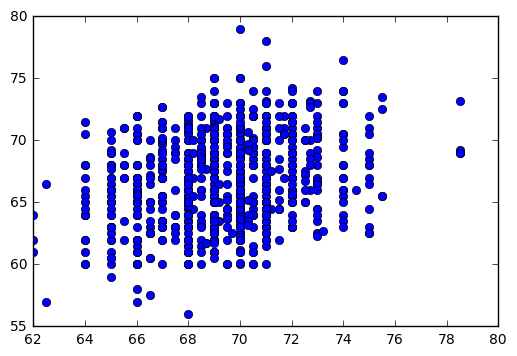

In [272]:
# reference: https://pygot.wordpress.com/2017/03/25/simple-linear-regression-with-galton/
import csv
import csv
import requests # pip install requests for easy http request for CSV data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "http://www.math.uah.edu/stat/data/Galton.csv"
 
# Get data from URL and load into a dataframe
# More efficient options for doing this,
with requests.Session() as s:
    download = s.get(url)
    decoded_content = download.content.decode('utf-8')
    data_iter = csv.reader(decoded_content.splitlines(), delimiter=',')
    data = [data for data in data_iter]
    df = pd.DataFrame(data[1:]) #skip first line
    df.columns = data[0] #first line of CSV has col names
    
# print(df.head())
# print("\n", df.dtypes)
# print("\n", df.describe())

df[['Father', 'Mother', 'Height', 'Kids']] = df[['Father', 'Mother', 'Height', 'Kids']].apply(pd.to_numeric)
# print("\n", df.describe(include=['number']))
x_data = pd.Series(df['Father'])
y_data = pd.Series(df['Height'])
X = x[:,np.newaxis] # manipulate shape

plt.plot(x_data, y_data, 'o')
plt.show()

In [273]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X,y_data) # X is row/col fmt, y is vector
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)

ypred = model.predict(75)
print("Prediction for Height of 75:",ypred.round(2))
ypred = model.predict(60)
print("Prediction for Height of 60:",ypred.round(2))

Coefficient: 
 [ 0.39938127]
Intercept: 
 39.1103868371
Prediction for Height of 75: [ 69.06]
Prediction for Height of 60: [ 63.07]


In [270]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
hypothesis = W*X + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
optimizer = tf.train.AdamOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(50000):
        _, cost_val = sess.run([train_op, cost], feed_dict={X:x_data.values, Y:y_data.values})
        
        if (step + 1) % 10000 == 0:
            print('Step:', step + 1, 'Cost:', cost_val, 'Bias:', b.eval(), 'W:', W.eval())
            
    # prediction
    print(sess.run(hypothesis, feed_dict={X:75}))
    print(sess.run(hypothesis, feed_dict={X:60}))

Step: 10000 Cost: 11.8508 Bias: [ 38.95603561] W: [ 0.40160495]
Step: 20000 Cost: 11.851 Bias: [ 39.11009598] W: [ 0.39954612]
Step: 30000 Cost: 11.8692 Bias: [ 39.11135483] W: [ 0.40042049]
Step: 40000 Cost: 11.8508 Bias: [ 39.11032486] W: [ 0.39938217]
Step: 50000 Cost: 11.8508 Bias: [ 39.11044312] W: [ 0.39938638]
[ 69.06442261]
[ 63.07362366]


In [196]:
saver = tf.train.Saver(tf.global_variables())

- tf.train.get_checkpoint_state
 - model_checkpoint_path

- tf.train.checkpoint_exists

In [ ]:
saver = tf.train.Saver(tf.global_variables())

- class tf.**Session**

> - run(
    fetches,
    feed_dict=None,
    options=None,
    run_metadata=None
)

> (Args):
- fetches: A single graph element, a list of graph elements, or a dictionary whose values are graph elements or lists of graph elements (described above).
- feed_dict: A dictionary that maps graph elements to values (described above).
- options: A [RunOptions] protocol buffer
- run_metadata: A [RunMetadata] protocol buffer

In [180]:
import numpy as np

y_data = np.array([[0   , 1   , 0   ], [0, 0, 1]], dtype=np.float32)
z_data = np.array([[10., 20., 25.], [1., 1., 5.]], dtype=np.float32)

y = tf.placeholder(tf.float32)
z = tf.placeholder(tf.float32)
cost = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=z)

with tf.Session() as sess:
    print(sess.run(cost, feed_dict={y:y_data, z:z_data}))

[ 5.00671577  0.03597625]


-
 - close()
 > https://www.tensorflow.org/api_docs/python/tf/Session

In [120]:
hello = tf.constant('Hello, Tensorflow')

sess = tf.Session()
print(sess.run(hello))
sess.close()

b'Hello, Tensorflow'


In [121]:
hello = tf.constant('Hello, Tensorflow')

with tf.Session() as sess:
    print(hello.eval())

b'Hello, Tensorflow'


- tf.name_scope

- tf.summary.scalar

In [4]:
tf.summary.scalar('cost', cost)m

SyntaxError: invalid syntax (<ipython-input-4-5c39254c7094>, line 1)

###### - tf.summary.merge_all()

In [ ]:
tf.summary.FileWriter('./logs', sess.graph)

### NUMBER GENERATION

- tf.zeros

In [133]:
b1 = tf.Variable(tf.zeros([10]))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(b1))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


- tf.random_normal(
    shape,
    mean=0.0,
    stddev=1.0,
    dtype=tf.float32,
    seed=None,
    name=None
)

In [92]:
W = tf.Variable(tf.random_normal([3,2]))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run([W]))
    print(W.eval())

[array([[-0.28943199,  0.84191501],
       [ 0.73050255,  0.7467351 ],
       [ 0.23677132,  0.0469747 ]], dtype=float32)]
[[-0.28943199  0.84191501]
 [ 0.73050255  0.7467351 ]
 [ 0.23677132  0.0469747 ]]


- tf.random_uniform

### TYPES

- tf.float32

In [122]:
X = tf.placeholder(tf.float32, [None, 3])

- tf.cast

In [105]:
A = tf.constant([[1, 2, 3], [4, 5, 6]])
B = tf.constant([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
C = tf.matmul(tf.cast(A, tf.float32), B)
# C = tf.matmul(A, B)
with tf.Session() as sess:
    print(C.eval())

[[ 2.20000005  2.80000019]
 [ 4.9000001   6.4000001 ]]


### OPTIMIZER

- tf.train.GradientDescentOptimizer
 - minimize

- tf.train.AdamOptimizer
 - minimize
 > https://arxiv.org/pdf/1412.6980.pdf

### NEURAL NET

- tf.nn.**softmax_cross_entropy_with_logits**

> Args:
- _sentinel: Used to prevent positional parameters. Internal, do not use.
- labels: Each row labels[i] must be a valid probability distribution.
- logits: <u>Unscaled log probabilities.</u>
- dim: The class dimension. Defaulted to -1 which is the last dimension.
- name: A name for the operation (optional).

> logits는 output layer neuren에 입력으로 들어가는 weighted sum, $z_i$이다.

In [181]:
import numpy as np

labels = np.array([[0   , 1   , 0   ], [0, 0, 1]], dtype=np.float32)
logits = np.array([[10., 20., 25.], [1., 1., 5.]], dtype=np.float32)



with tf.Session() as sess:
    print(tf.nn.softmax(logits).eval())
    print(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits).eval())
    print(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits)).eval())

[[  3.03854847e-07   6.69284863e-03   9.93306816e-01]
 [  1.76684242e-02   1.76684242e-02   9.64663208e-01]]
[ 5.00671577  0.03597625]
2.52135


In [166]:
loss = [-1.0 * np.log(np.exp(20) / (np.exp(10) + np.exp(20) + np.exp(25))),\
        -1.0 * np.log(np.exp(5) / (np.exp(1) + np.exp(1) + np.exp(5)))]
print(loss)
np.mean(loss)

[5.0067156523440337, 0.035976299748193066]


2.5213459760461134

> Softmax function은 아래와 같다.
> $$y_i = \mathrm{softmax}(\mathbf{z})_i = \frac{\exp(z_i)}{\sum_{j \in group} \exp(z_j)}$$


> 이 출력 label($y_j$)과 실제 label $t_j$를 비교하여 아래와 같은 cross-entropy를 구할 수 있다.

>$$C = -\sum_{j}t_j log y_j$$

- tf.nn.**nce_loss**

> 보통의 방법으로 '단어들 벡터'를 학습시키는 과정을 살펴보면, 입력 단어들이 주어지고 출력 단어를 예측하는데, 이는 일반적인 다항분류 문제이고 출력 단어의 후보가 많을 경우 뉴런의 수 또한 많아져야 한다. 또한 일반적으로 출력 레이어의 값을 토대로 예측 단어를 선택할 때 softmax-cross-entropy를 사용하는데, softmax는 출력 레이어가 커질 경우 그 계산 비용이 매우 커지는 단점을 갖고 있다.

> 위와 같이 softmax의 계산 비용이 매우 커지는 문제를 해결하는 방법으로 noise-contrastive estimation(NCE)이라는 것을 사용하게 된다. 이 방법은 처음 [A]에서 소개되었고 [B]에서 정식화 되고 [C], [D], [E]에서 word embedding을 계산하는데 사용된바 있다.

> 기본 아이디어는 **다항분류 문제**를 **이항분류 문제**로 바꾸는 것이다. 예를들어 3단어 입력이 주어지고 다음 단어를 예측하는 문제는 후보 단어가 1만개라면 1만개 단어에 대한 softmax값(다항분류)을 구하고 그 값이 가장 큰 값을 다음 단어로 예측하는 것이 일반적인 방법이라면, NCE에서는 옳은 쌍의 4단어(나는 여기에서 밥을 먹어요)와 옳지 않은 4단어 쌍(나는 여기에서 밥을 철수가)으로 모형을 학습시켜서 어떤 단어 쌍이 옳은 것인지 아닌지(이항분류)를 구분하게 된다.

> Word2Vec에서는 이 과정을 조금 수정한 negative sampling을 사용하는데, 앞서 옳지 않은 단어쌍으로 임의로 '보다 덜 나올 만한' 단어들을 사용하는 방식이다.  <a href='https://stats.stackexchange.com/questions/244616/how-sampling-works-in-word2vec-can-someone-please-make-me-understand-nce-and-ne/245452#245452'>[출처]</a> 


> [A] <a href='http://www.cs.cmu.edu/~nasmith/papers/smith+eisner.acl05.pdf'>(2005) - Contrastive estimation: Training log-linear models on unlabeled data</a>    
> [B] <a href='http://proceedings.mlr.press/v9/gutmann10a/gutmann10a.pdf'>(2010) - Noise-contrastive estimation: A new estimation principle for unnormalized statistical models</a>    
> [C] <a href='http://dl.acm.org/citation.cfm?id=1390177'>(2008) - A unified architecture for natural language processing: Deep neural networks with multitask learning</a>    
> [D] <a href='https://www.cs.toronto.edu/~amnih/papers/ncelm.pdf'>(2012) - A fast and simple algorithm for training neural probabilistic language models.</a>   
> [E] <a href='https://papers.nips.cc/paper/5165-learning-word-embeddings-efficiently-with-noise-contrastive-estimation.pdf'>(2013) - Learning word embeddings efficiently with noise-contrastive estimation.</a>

> Computes and returns the noise-contrastive estimation training loss.

> Args:
- weights: A Tensor of shape [num_classes, dim], or a list of Tensor objects whose concatenation along dimension 0 has shape [num_classes, dim]. The (possibly-partitioned) class embeddings.
- biases: A Tensor of shape [num_classes]. The class biases.
- labels: A Tensor of type int64 and shape [batch_size, num_true]. The target classes.
- inputs: A Tensor of shape [batch_size, dim]. The forward activations of the input network.
- num_sampled: An int. The number of classes to randomly sample per batch.
- num_classes: An int. The number of possible classes.
- num_true: An int. The number of target classes per training example.
- sampled_values: a tuple of (sampled_candidates, true_expected_count, sampled_expected_count) returned by a *_candidate_sampler function. (if None, we default to log_uniform_candidate_sampler)
- remove_accidental_hits: A bool. Whether to remove "accidental hits" where a sampled class equals one of the target classes. If set to True, this is a "Sampled Logistic" loss instead of NCE, and we are learning to generate log-odds instead of log probabilities. See our [Candidate Sampling Algorithms Reference] (https://www.tensorflow.org/extras/candidate_sampling.pdf). Default is False.
- partition_strategy: A string specifying the partitioning strategy, relevant if len(weights) > 1. Currently "div" and "mod" are supported. Default is "mod". See tf.nn.embedding_lookup for more details.
- name: A name for the operation (optional).

- tf.nn.**relu**(
    features,
    name=None
)

> Args:
- features: A Tensor. Must be one of the following types: float32, float64, int32, int64, uint8, int16, int8, uint16, half.
- name: A name for the operation (optional).

In [177]:
x = tf.constant([i for i in range(-10, 10)])
with tf.Session() as sess:
    print(tf.nn.relu(x).eval())

[0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9]


- tf.nn.**softmax**

<img  src="./_images/04_softmax3.PNG"/>

- tf.nn.**embedding_lookup**

In [195]:
embeddings = tf.constant([i for i in range(0, 20)])
ids = tf.constant([3, 6, 9])
selected_embed = tf.nn.embedding_lookup(embeddings, ids)

with tf.Session() as sess:
    print(embeddings.eval())
    print(selected_embed.eval())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[3 6 9]


### MATH

- tf.add(
    x,
    y,
    name=None
)

In [123]:
a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a, b)

print(c)
with tf.Session() as sess:
    print(c.eval())

Tensor("Add_3:0", shape=(), dtype=int32)
42


- tf.square

In [124]:
a = tf.constant(10)
with tf.Session() as sess:
    print(tf.square(a).eval())

100


- tf.sqrt(
    x,
    name=None
)

> argument로 half, float32, float64, conplex64, complex128이 주어져야 한다. int가 주어질 경우 에러

In [125]:
a = tf.constant(10.)
with tf.Session() as sess:
    print(tf.sqrt(a).eval())

3.16228


- tf.log

- tf.matmul

In [126]:
A = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.float32)
B = tf.constant([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
C = tf.matmul(A, B)
with tf.Session() as sess:
    print(C.eval())

[[ 2.20000005  2.80000019]
 [ 4.9000001   6.4000001 ]]


- tf.equal

.

### AGGREGATION

- tf.reduce_mean(
    input_tensor,
    axis=None,
    keep_dims=False,
    name=None,
    reduction_indices=None
)

> axis로 지정한 dim을 1로 만듬

In [129]:
x = tf.constant([[1., 1., 1.], [2., 2., 2.]])
with tf.Session() as sess:
    print(sess.run(tf.reduce_mean(input_tensor=x, axis=1)))

[ 1.  2.]


In [128]:
x

<tf.Tensor 'Const_65:0' shape=(2, 3) dtype=float32>

- tf.reduce_sum

- tf.argmax(
    input,
    axis=None,
    name=None,
    dimension=None
)

In [186]:
y_data = np.array([[0   , 1   , 0   ], [0, 0, 1]], dtype=np.float32)

y = tf.placeholder(tf.float32)

with tf.Session() as sess:
    print(sess.run(tf.argmax(input=y, axis=0), feed_dict={y:y_data}))
    print(sess.run(tf.argmax(input=y, axis=1), feed_dict={y:y_data}))

[0 0 1]
[1 2]


### ?

.

.

.

.

.

.

.

.

.

.